In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [31]:
df = pd.read_csv('./data/df_clean.csv')
df.head()

/tmp/ipykernel_1159/1659319452.py:1: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/df_clean.csv')


,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Gear_Bear_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Max,Rtr_RPM_Min,Rtr_RPM_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Prod_LatestAvg_ActPwrGen0,Prod_LatestAvg_ActPwrGen1,Prod_LatestAvg_ActPwrGen2,Prod_LatestAvg_TotActPwr,Prod_LatestAvg_ReactPwrGen0,Prod_LatestAvg_ReactPwrGen1,Prod_LatestAvg_ReactPwrGen2,Prod_LatestAvg_TotReactPwr,HVTrafo_Phase1_Temp_Avg,HVTrafo_Phase2_Temp_Avg,HVTrafo_Phase3_Temp_Avg,Grd_InverterPhase1_Temp_Avg,Cont_Top_Temp_Avg,Cont_Hub_Temp_Avg,Cont_VCP_Temp_Avg,Gen_SlipRing_Temp_Avg,Spin_Temp_Avg,Blds_PitchAngle_Min,Blds_PitchAngle_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Cont_VCP_ChokcoilTemp_Avg,Grd_RtrInvPhase1_Temp_Avg,Grd_RtrInvPhase2_Temp_Avg,Grd_RtrInvPhase3_Temp_Avg,Cont_VCP_WtrTemp_Avg,Grd_Prod_Pwr_Avg,Grd_Prod_CosPhi_Avg,Grd_Prod_Freq_Avg,Grd_Prod_VoltPhse1_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_VoltPhse3_Avg,Grd_Prod_CurPhse1_Avg,Grd_Prod_CurPhse2_Avg,Grd_Prod_CurPhse3_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min,Grd_Busbar_Temp_Avg,Rtr_RPM_Std,Amb_WindSpeed_Est_Avg,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Max,Grd_Prod_ReactPwr_Min,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Max,Grd_Prod_PsblePwr_Min,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,logs_Remark,fail_Remark,fail,block_id,status,block_len,off_start,prior_7d_off,prior_1h_off
0,T01,2016-01-01 00:00:00,1277.4,1226.1,1249.0,9.0,41.0,58.0,59.0,58.0,30.0,44.0,48.0,28.0,11.3,10.9,11.1,11.6,0.5,3.3,0.9,-12.4,206.1,18.0,-107.0,4420.0,0.0,4313.0,-99.0,-5636.0,0.0,-5735.0,68.0,76.0,65.0,39.0,39.0,28.0,43.0,25.0,20.0,-1.1,4.5,0.6,0.9,91.0,39.0,39.0,38.0,39.0,26.2,0.7,50.0,401.6,399.9,399.2,46.5,61.1,45.5,118.4,-33.5,38.0,0.1,3.6,35.3,-34.9,13.2,-100.0,36.2,29.4,119.3,0.0,31.9,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37.0,218.5,NaN,NaN,0,1,off - low wind,1,0,0,0
1,T01,2016-01-01 00:10:00,1268.3,93.3,999.7,435.9,41.0,58.0,59.0,59.0,30.0,44.0,48.0,28.0,11.2,0.0,8.8,12.5,0.4,3.2,0.9,-1.1,217.4,18.0,-753.0,2488.0,0.0,1735.0,-867.0,-3871.0,0.0,-4738.0,68.0,76.0,65.0,38.0,39.0,28.0,42.0,25.0,20.0,-0.9,59.6,8.1,14.7,91.0,37.0,36.0,37.0,37.0,10.1,0.7,50.0,401.9,400.7,399.5,34.3,41.9,33.6,101.5,-38.2,38.0,4.0,3.3,30.2,-28.0,1.8,-100.1,34.6,21.7,102.3,0.0,24.7,-79.6,0.0,-501.0,123.7,79.6,501.0,0.0,123.7,37.0,218.5,"Generator 1 in, External power ref.:2000kW",NaN,0,2,on,13,0,0,0
2,T01,2016-01-01 00:20:00,1394.4,220.3,774.0,486.1,41.0,57.0,57.0,57.0,30.0,43.0,46.0,29.0,12.3,1.9,6.8,8.8,0.7,4.3,1.0,-5.8,207.4,18.0,-784.0,10488.0,0.0,9704.0,-410.0,-1865.0,0.0,-2275.0,68.0,76.0,65.0,39.0,39.0,28.0,42.0,25.0,20.0,-2.2,24.0,10.4,12.4,87.0,38.0,37.0,37.0,38.0,59.0,0.7,50.0,401.4,400.5,398.8,78.6,92.7,86.1,219.4,-34.1,38.0,4.3,4.1,77.5,-13.9,999.9,-108.1,154.8,88.9,224.9,0.0,54.3,-314.0,0.0,-1000.0,357.4,314.0,1000.0,0.0,357.4,37.0,213.3,NaN,NaN,0,2,on,13,0,0,0
3,T01,2016-01-01 00:30:00,1306.6,1212.4,1257.1,17.0,40.0,56.0,57.0,57.0,30.0,44.0,48.0,28.0,11.5,10.7,11.1,9.9,0.7,4.4,1.1,9.6,232.0,18.0,0.0,22673.0,0.0,22673.0,0.0,-15822.0,0.0,-15822.0,68.0,76.0,65.0,39.0,39.0,28.0,42.0,25.0,20.0,-1.9,0.9,-0.5,0.8,87.0,38.0,38.0,38.0,38.0,135.7,0.8,50.0,399.7,398.1,396.9,128.1,160.8,136.8,250.3,-27.7,38.0,0.1,4.6,53.9,-94.9,0.0,-105.1,18.4,135.3,261.4,0.0,53.1,-654.0,0.0,-1000.0,245.8,654.0,1000.0,0.0,245.8,36.0,222.4,NaN,NaN,0,2,on,13,0,0,0
4,T01,2016-01-01 00:40:00,1320.9,1224.1,1257.7,18.0,40.0,57.0,58.0,57.0,30.0,44.0,48.0,28.0,11.7,10.8,11.1,9.9,0.8,4.1,1.2,23.3,245.6,18.0,-75.0,16581.0,0.0,16506.0,-79.0,-13314.0,0.0,-13394.0,68.0,76.0,65.0,39.0,39.0,28.0,42.0,25.0,20.0,-2.0,4.4,-0.1,1.2,88.0,3

In [39]:
status = df.groupby(['Turbine_ID','status']).agg(generated_power=('Grd_Prod_Pwr_Avg','sum'), n_blocks=('block_id','nunique'), total_duration=('status','count')).reset_index()
status.total_duration = status.total_duration*10
status['mean_duration'] = status.total_duration / status.n_blocks
status.sort_values(by=['status'])
status.to_excel('status.xlsx')

### Analysis of moments prior to a shutdown
Correlation of metrics of a given day with the presence of failures or stops one week before

In [40]:
corr_t01 = df[df.Turbine_ID=='T01'].select_dtypes(include='number').corr().prior_7d_off.sort_values()
corr_t06 = df[df.Turbine_ID=='T06'].select_dtypes(include='number').corr().prior_7d_off.sort_values()
corr_t07 = df[df.Turbine_ID=='T07'].select_dtypes(include='number').corr().prior_7d_off.sort_values()
corr_t11 = df[df.Turbine_ID=='T11'].select_dtypes(include='number').corr().prior_7d_off.sort_values()
df_corr = pd.DataFrame({'T01': corr_t01, 'T06':corr_t06, 'T07':corr_t07, 'T11':corr_t11})
df_corr['avg_abs_corr'] = np.abs(df_corr.mean(axis=1))
df_corr = df_corr[df_corr.index.isin(['prior_7d_off','block_id','fail','prior_1h_off','block_len','off_start'])==False].sort_values(by=['avg_abs_corr'], ascending=False)
df_corr.to_excel('df_corr.xlsx')
df_corr

,T01,T06,T07,T11,avg_abs_corr
Amb_Temp_Avg,0.046853,0.070297,0.042717,0.028446,0.047078
Nac_Temp_Avg,0.042225,0.059477,0.040300,0.039757,0.045440
Gen_SlipRing_Temp_Avg,0.044170,0.046359,0.033013,0.048029,0.042893
Spin_Temp_Avg,0.034052,0.063907,0.036793,0.030115,0.041216
Hyd_Oil_Temp_Avg,0.042102,0.047188,0.008879,0.057636,0.038951
Cont_Top_Temp_Avg,0.034796,0.050111,0.027387,0.043285,0.038895
Cont_Hub_Temp_Avg,0.027473,0.060040,0.040546,0.026100,0.038540
Cont_VCP_Temp_Avg,0.032315,0.044365,0.017500,0.036137,0.032579
Grd_Busbar_Temp_Avg,0.030164,0.037015,0.014274,0.036989,0.029610
Amb_WindSpeed_Std,0.045387,0.017367,0.007656,0.047229,0.029410


In [55]:
df_corr.index[0]

'Amb_Temp_Avg'

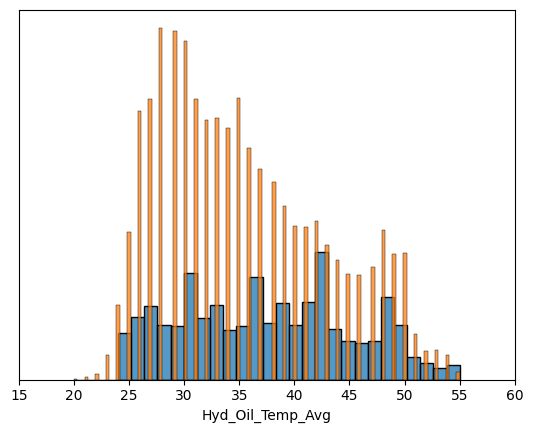

In [69]:
import seaborn as sns
# for 
sns.histplot(data=df[df.prior_7d_off==1], x=df_corr.index[4], stat='density', legend=True, label='prior to fail')
sns.histplot(data=df[df.prior_7d_off!=1], x=df_corr.index[4], stat='density', legend=True, label='not prior to fail')
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlim(15, 60)
# plt.legend()
plt.show()

### Backup

In [29]:
df[(df.fail_Remark.isna()==False)][['Turbine_ID','Timestamp','Grd_Prod_Pwr_Avg','Amb_WindSpeed_Avg','status','block_id','logs_Remark','fail_Remark']]
# check = df[['Turbine_ID','Timestamp','Grd_Prod_Pwr_Avg','Amb_WindSpeed_Avg','status','block_id','logs_Remark','fail_Remark']]

,Turbine_ID,Timestamp,Grd_Prod_Pwr_Avg,Amb_WindSpeed_Avg,status,block_id,logs_Remark,fail_Remark
28669,T01,2016-07-18 02:10:00,441.6,12.5,on,868,"Run, Reset:2016-07-18 02:20:00Thermoerr. oil p...",GEARBOX: Gearbox pump damaged
84751,T01,2017-08-11 13:10:00,1999.8,16.4,on,2426,"Key switch: Local/Remote, User 0 primary ac...",TRANSFORMER: Transformer fan damaged
118913,T06,2016-04-04 18:50:00,-21.6,9.7,on,544,"Key switch: Local/Remote, User 0 primary ac...",HYDRAULIC_GROUP: Error in pitch regulation
133030,T06,2016-07-11 19:40:00,NaN,NaN,off - low wind,933,NaN,GENERATOR: Generator replaced
134886,T06,2016-07-24 17:00:00,1999.4,14.8,on,942,"User 0 primary access, Key switch: Local co...",GENERATOR: Generator temperature sensor failure
140880,T06,2016-09-04 08:00:00,227.6,5.3,on,1050,Reset:2016-09-04 08:10:00High temperature Gen2...,GENERATOR: High temperature generator error
144966,T06,2016-10-02 17:00:00,237.7,5.2,on,1172,"Key switch: Local control, Key switch: Local/R...",GENERATOR: Refrigeration system and temperatur...
148562,T06,2016-10-27 16:20:00,1942.2,12.2,on,1278,External power ref.:2000kW,GENERATOR: Generator replaced
191146,T06,2017-08-19 09:40:00,-5.3,1.6,off - low wind,2507,"Nac.vent.2, nac/gear: 33/ 41°C, Nac.vent.1, na...",HYDRAULIC_GROUP: Oil leakage in Hub
199635,T06,2017-10-17 08:30:00,717.5,7.2,on,2690,"Key switch: Local/Remote, User 0 primary ac...",GEARBOX: Gearbox bearings damaged
